#### 사전준비

In [49]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as su

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload

In [50]:
# 한글 설정/차트 마이너스 깨짐현상 없애기 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')


In [51]:
# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn as sk

### 전체 데이터 로드
농어 길이, 무게 56개 샘플

In [52]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                     21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                     23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                     27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                     39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                     44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                     115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                     150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                     218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                     556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                     850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                     1000.0])

#### 훈련세트/테스트세트 분리

In [53]:
from sklearn.model_selection import train_test_split

# 훈련세트 / 테스트세트 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [54]:
# 훈력입력세트 / 테스트입력세트 2차원 변경
new_train_input = np.row_stack((train_input))
new_train_input.shape

(42, 1)

In [55]:
# 테스트입력세트
new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

#### 모델훈련

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3) # 3으로 적당히 훈련

In [57]:
# 훈련세트로 훈련
knr.fit(X=new_train_input, y=train_target)

KNeighborsRegressor(n_neighbors=3)

In [58]:
# 결정계수 확인
knr.score(X=new_train_input, y=train_target)

0.9804899950518966

In [59]:
knr.score(X=new_test_input, y=test_target)

0.9746459963987609

In [60]:
# 길이가 50com일 때 무게가 얼마로 예측되나 -> 실패
knr.predict([[50.0]])

array([1033.33333333])

##### 훈련세트에 대한 산점도

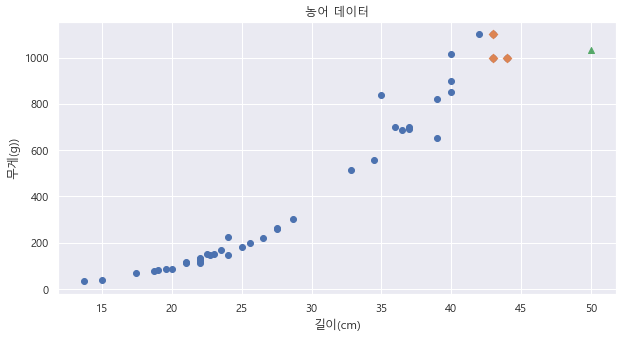

In [61]:
# 길이 50cm 농어에 대한 이웃값 3개 구하기
# 
dist, inds = knr.kneighbors([[50.0]]) # inds;index

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
plt.scatter(x=new_train_input[inds], y=train_target[inds], marker='D')
plt.scatter(x=50, y=knr.predict([[50.0]])[0], marker='^')

plt.title('농어 데이터')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g))')
plt.show()

##### 이웃값 3개에 대한 평균

In [62]:
np.mean(train_target[inds])#(target:무게)

1033.3333333333333

In [63]:
# 길이를 어떤거로(100cm로) 바꿔도 1033.33333 나옴
#
knr.predict(X=[[100]])

array([1033.33333333])

#### 선형회귀 Linear Regression
가장 대표적인 회귀 알고리즘

In [64]:
# KNN X --> LinearRegression 0
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [65]:
# 선형회귀 모델로 훈련
lr.fit(X=new_train_input, y=train_target)

LinearRegression()

In [66]:
# 훈련데이터로 결정계수확인
lr.score(X=new_train_input, y=train_target)

0.9398463339976041

In [67]:
# 테스트데이터로 결정계수확인
lr.score(X=new_test_input, y=test_target)

0.824750312331356

In [68]:
# 길이 50cm 일 경우 예축
lr.predict([[50.0]])
# KNN: 1033.3333 -> Linear Reg: 1241.8386


array([1241.83860323])

In [69]:
# 1ck qkdwjdtlrdml rkqtdmf ehcnf
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


- coef_(계수) = 가중치(weight) = 기울기
- intercept_(절편) = 잔차(error)

Linear Regression 산점도

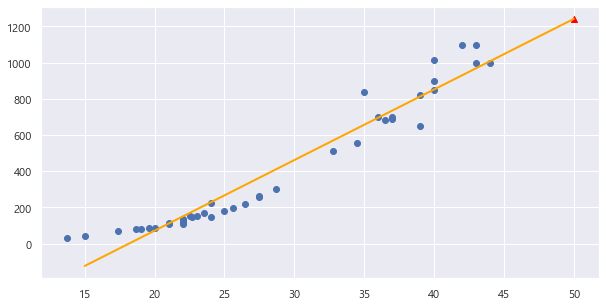

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
plt.scatter(x=50, y=lr.predict([[50]]), marker='^', color='red')

# 1차방정식 선그래프
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='orange', linewidth='2.0')
plt.plot
plt.show()

다항회귀

In [71]:
train_poly = np.column_stack((new_train_input ** 2, new_train_input))
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [72]:
test_poly = np.column_stack((new_test_input ** 2, new_test_input))
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [73]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


다항 선형회귀

In [74]:
lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)

LinearRegression()

In [75]:
# 테스트데이터로 결정계수 확인
lr.score(X=test_poly, y=test_target)

0.9775935108325122

In [76]:
# 길이 50cm 농어의 무게 예측
# 길이의 제곱, 길이
lr.predict([[50.0**2, 50.0]])
# 농어의 무게 예측 = 1573.98 g

array([1573.98423528])

In [77]:
# 맞는 값인지 다시 확인
print(lr.coef_, lr.intercept_) # [가중치], 절편

[  1.01433211 -21.55792498] 116.05021078278264


In [78]:
# a * 길이 * 길이 + b + 길이 + c
# a = 
# b = -21.5579
# c = 116.0502
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


In [79]:
lr.coef_[0]

1.0143321093767301

In [80]:
lr.coef_[1]

-21.55792497883735

In [81]:
lr.intercept_

116.05021078278264

다항 회귀 산점도

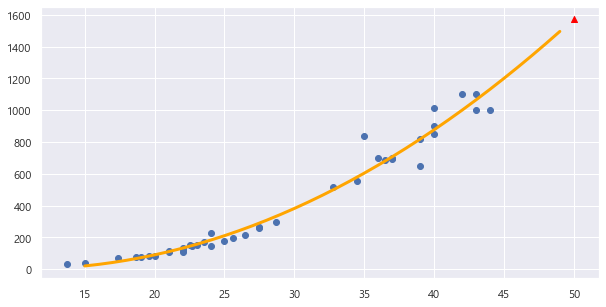

In [82]:
point = np.arange(15, 50)

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
# 15~49까지의 2차 방정식 그림
# point: 길이
plt.plot(point, lr.coef_[0]*(point**2) + lr.coef_[1]*point + lr.intercept_, color='orange', linewidth='3.0')
plt.scatter(x=[50.0], y=lr.predict([[50.0**2, 50.0]]), marker='^', color='red')
plt.show()
# 그래프 패턴에 가까워짐